In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [10]:
df = pd.read_csv('Monthly_CPI_data_w_percent_change.csv', index_col = 0)

<AxesSubplot:>

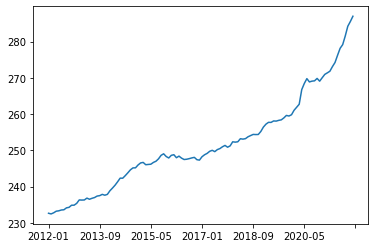

In [11]:
df.loc[~df.index.str.contains("Percent Change"), "Food"].plot() 

In [12]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
    dftest = adfuller(dataset, autolag = 'AIC')
    print("1. ADF : ",dftest[0])
    print("2. P-Value : ", dftest[1])
    print("3. Num Of Lags : ", dftest[2])
    print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
    print("5. Critical Values :")
    for key, val in dftest[4].items():
        print("\t",key, ": ", val)

In [13]:
adf_test(df.loc[~df.index.str.contains("Percent Change"), "Food"])

1. ADF :  2.3954529483435905
2. P-Value :  0.9990081536860544
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 107
5. Critical Values :
	 1% :  -3.492995948509562
	 5% :  -2.888954648057252
	 10% :  -2.58139291903223


__P-value is greater than .05, so the data is not stationary. As can be seen by the scatter plot, the CPI of food is steadily rising as time goes on, which is one explaination as to why it is not stationary. How might we address this? We could theorectically transform our data to help, but each category looks very different so it would be very difficult to find a method that works across most categories. I will be testing a few more categories and choosing the one with the best p-value__

1. ADF :  -2.4943550477219776
2. P-Value :  0.11685385107043395
3. Num Of Lags :  1
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 118
5. Critical Values :
	 1% :  -3.4870216863700767
	 5% :  -2.8863625166643136
	 10% :  -2.580009026141913


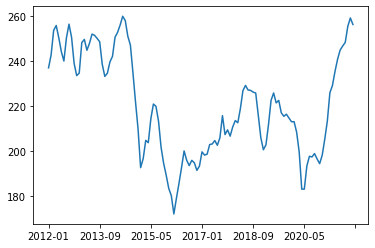

In [17]:
df.loc[~df.index.str.contains("Percent Change"), "Energy"].plot()
adf_test(df.loc[~df.index.str.contains("Percent Change"), "Energy"])

1. ADF :  -1.9187378276215878
2. P-Value :  0.3232982349589514
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 107
5. Critical Values :
	 1% :  -3.492995948509562
	 5% :  -2.888954648057252
	 10% :  -2.58139291903223


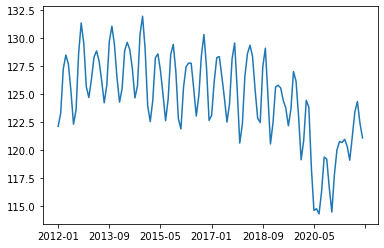

In [19]:
df.loc[~df.index.str.contains("Percent Change"), "Apparel"].plot()
adf_test(df.loc[~df.index.str.contains("Percent Change"), "Apparel"])

1. ADF :  0.9164605904517608
2. P-Value :  0.9933014250631517
3. Num Of Lags :  2
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 117
5. Critical Values :
	 1% :  -3.487517288664615
	 5% :  -2.8865777180380032
	 10% :  -2.5801239192052012


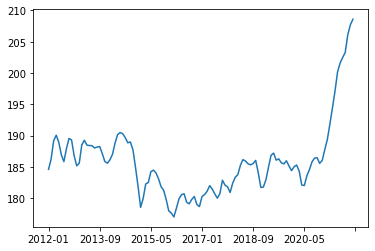

In [24]:
df.loc[~df.index.str.contains("Percent Change"), "Commodities"].plot()
adf_test(df.loc[~df.index.str.contains("Percent Change"), "Commodities"])

In [16]:
from pmdarima import auto_arima
import warnings

warnings.filterwarnings("ignore")

stepwise_fit = auto_arima(df.loc[~df.index.str.contains("Percent Change"), "Energy"], suppress_warnings=True)           
print(stepwise_fit)
stepwise_fit.summary()

 ARIMA(0,1,1)(0,0,0)[0]          


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  120
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -369.890
Date:                Wed, 02 Mar 2022   AIC                            743.780
Time:                        07:37:23   BIC                            749.339
Sample:                             0   HQIC                           746.037
                                - 120                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.5395      0.079      6.831      0.000       0.385       0.694
sigma2        29.2499      3.893      7.514      0.000      21.621      36.879
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):                 0.07
Prob(Q):                              0.71   Prob(JB):                         0.97
Heteroskedasticity (H):               0.64   Skew:                            -0.04
Prob(H) (two-sided):                  0.16   Kurtosis:                         2.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [30]:
x = df.loc[~df.index.str.contains("Percent Change"), "Energy"]

train=x.iloc[:-36]
test=x.iloc[-36:]

print(test.iloc[0],test.iloc[-1])

200.563 256.207
